# Application Programming Interface 

une API définit les règles d'accès et de modification de données présentes sur un serveur accessible en ligne.

La connexion aux sites distants se fait à l'aide de requête HTTP. Le protocole HTTP (HyperText Transfer Protocol) est le protocole le plus utilisé sur Internet depuis 1990. Le but du protocole HTTP est de permettre un transfert de fichiers (essentiellement au format HTML), localisés grâce à une chaîne de caractères appelée URL, entre un navigateur (le client) et un serveur Web. On distingue plusieurs types de requêtes :

- Get (pour récupérer des données)
- Post (pour envoyer des données)
- Put (pour modifier des données existantes)
- Delete (pour supprimer des données existantes)

Dans le cadre de ce cours, nous allons utiliser les API dans le but d'extraire des données présentes dans des serveurs distants à l'aide de scripts Python. Pour cela, nous allons nous intéresser aux requêtes de types "Get".
Une requête "Get" est caractérisée par :

- L'adresse du site. Exemple : http://api.openweathermap.org/data/2.5/weather 
- Les paramètres qui sont les entrées (input) de la requête
- L'entête qui contient les identifants d'accès.


Pour pouvoir lancer des requêtes à partir de scripts Python, il faut installer la librairie "requests" avec la commande pip : "pip install requests". 

Il est important de consulter la documentation de l'interface de programmation avant de l'utiliser.

Les deux caractérsitiques importantes pour une API à considérer :
- modes d'authentification
- gratuite, payante ou partiellement payante

Quelques utilisations utiles des API :

- Se renseigner sur le climat actuel d'un pays ou d'une région 
- Connaitre le nombre de contaminations par le coronavirus dans un pays donné
- Connaitre la position actuelle d'un satellite artificiel
- Extraire des données financières et boursières
- Automatiser des publications sur les réseaux sociaux
- etc.

**Exemple 1 : utilisation de l'API "Open Notify" gratuite qui ne nécessite aucune authentification**

Cette interface permet d'obtenir des informations sur la station spatiale internationale (International Space Station) qui est une station spaciale placée en orbitre terrestre basse, occupée en permanence par un équipage international qui se consacre à la recherche scientifique dans le domaine spatial.

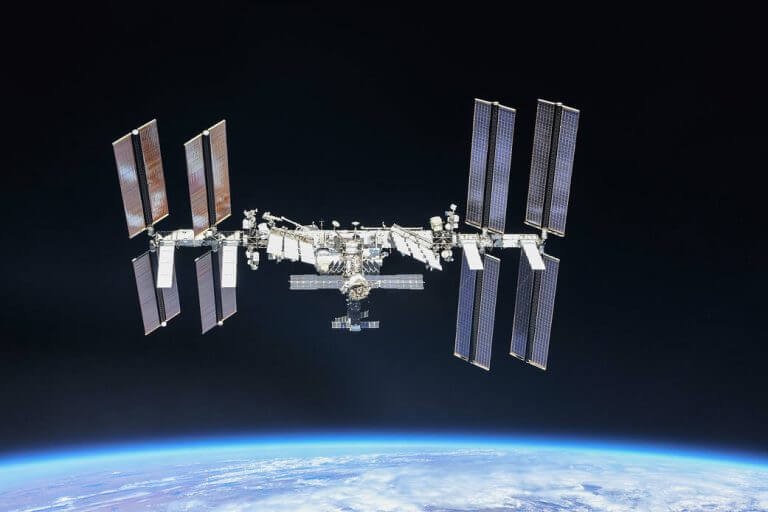

L'interface "Open Notify" http://open-notify.org/ présente plusieurs "endpoints", chaque "endpoint" permettant de réaliser une tâche particulière. 

**Le premier "endpoint" qu'on va utiliser est "http://api.open-notify.org/astros.json". Il ne nécessite aucune entrée et permet d'obtenir de l'information sur les astronautes qui sont actuellement dans l'espace.**

In [1]:
import requests

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


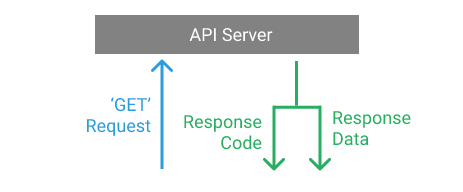

Le code 200 signifie que la requête a réussi. Si le code commence par 4 ou 5, ceci signifie qu'il y a une erreur. 

- 200 : succès de la requête ;
- 301 et 302 : redirection, respectivement permanente et temporaire ;
- 401 : utilisateur non authentifié ;
- 403 : accès refusé ;
- 404 : non trouvée trouvé;
- 500 et 503 : erreur serveur ;
- 504 : le serveur n'a pas répondu.


Dans la plupart des cas, les données sont retournées sous format json. La méthode json() de l'objet retourné par "requests.get()" permet de retourner un dictionnaire contenant les données : 

In [2]:
data=response.json()
print(data)
print(type(data))

{'message': 'success', 'number': 7, 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'}, {'craft': 'ISS', 'name': 'Kate Rubins'}, {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'}, {'craft': 'ISS', 'name': 'Mike Hopkins'}, {'craft': 'ISS', 'name': 'Victor Glover'}, {'craft': 'ISS', 'name': 'Shannon Walker'}, {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}
<class 'dict'>


On peut utiliser la méthode dumps() pour un affichage plus lisible du dictionnaire.

In [3]:
import json

text = json.dumps(data, indent=4)
print(text)

{
    "message": "success",
    "number": 7,
    "people": [
        {
            "craft": "ISS",
            "name": "Sergey Ryzhikov"
        },
        {
            "craft": "ISS",
            "name": "Kate Rubins"
        },
        {
            "craft": "ISS",
            "name": "Sergey Kud-Sverchkov"
        },
        {
            "craft": "ISS",
            "name": "Mike Hopkins"
        },
        {
            "craft": "ISS",
            "name": "Victor Glover"
        },
        {
            "craft": "ISS",
            "name": "Shannon Walker"
        },
        {
            "craft": "ISS",
            "name": "Soichi Noguchi"
        }
    ]
}


In [5]:
print(data['people'])

[{'craft': 'ISS', 'name': 'Sergey Ryzhikov'}, {'craft': 'ISS', 'name': 'Kate Rubins'}, {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'}, {'craft': 'ISS', 'name': 'Mike Hopkins'}, {'craft': 'ISS', 'name': 'Victor Glover'}, {'craft': 'ISS', 'name': 'Shannon Walker'}, {'craft': 'ISS', 'name': 'Soichi Noguchi'}]


In [7]:
ls = []
for dct in data['people']:
   ls.append(dct['name'])

print(ls)
liste=[data['people'][i]['name'] for i in range(data["number"])]
print(liste)

['Sergey Ryzhikov', 'Kate Rubins', 'Sergey Kud-Sverchkov', 'Mike Hopkins', 'Victor Glover', 'Shannon Walker', 'Soichi Noguchi']
['Sergey Ryzhikov', 'Kate Rubins', 'Sergey Kud-Sverchkov', 'Mike Hopkins', 'Victor Glover', 'Shannon Walker', 'Soichi Noguchi']


**Le deuxième "endpoint" : "http://api.open-notify.org/iss-now.json" permet de savoir où se trouve la station actuellement.**

In [8]:
import requests
response = requests.get("http://api.open-notify.org/iss-now.json")
d=response.json()
print(d)
lat=d["iss_position"]["latitude"]
long=d["iss_position"]["longitude"]

print("Latitude: ",lat,"Longitude :",long)

{'message': 'success', 'iss_position': {'latitude': '42.4773', 'longitude': '159.8960'}, 'timestamp': 1617865235}
Latitude:  42.4773 Longitude : 159.8960


In [ ]:
import turtle
response = requests.get("http://api.open-notify.org/iss-now.json")
d=response.json()
print(d)
lat=d["iss_position"]["latitude"]
long=d["iss_position"]["longitude"]

screen =turtle.Screen()
screen.setup(720,360) #Taille de l'image en pixels
screen.setworldcoordinates(-180,-90,180,90) #Les axes
screen.bgpic('map.gif')
iss=turtle.Turtle()
screen.register_shape('iss.gif')
iss.shape('iss.gif')
iss.setheading(90)
iss.penup()
iss.goto(float(long),float(lat))

## API nécessitant des entrées ou des paramètres

Le "endpoint"  http://api.open-notify.org/iss-pass.json permet de savoir quand est-ce que la station va passer au dessus d'un pays en fournissant sa latitude et longitude à la requête. Par exemple, pour savoir quand cette station va passer au dessus de notre pays, on fait :

In [11]:
from datetime import datetime

parameters = {
    "lat": 33.85,
    "lon": 35.86
}

response = requests.get("http://api.open-notify.org/iss-pass.json",params=parameters)
print(response.json())
pass_times = response.json()['response']
print(pass_times)
risetimes = []

for d in pass_times:
    time = d['risetime']
    risetimes.append(time)

times = []
for rt in risetimes:
    time = datetime.fromtimestamp(rt)
    times.append(time)
    print(time)

print(risetimes)

{'message': 'success', 'request': {'altitude': 100, 'datetime': 1617871448, 'latitude': 33.85, 'longitude': 35.86, 'passes': 5}, 'response': [{'duration': 560, 'risetime': 1617875814}, {'duration': 356, 'risetime': 1617881808}, {'duration': 395, 'risetime': 1617887704}, {'duration': 596, 'risetime': 1617893482}, {'duration': 640, 'risetime': 1617899277}]}
[{'duration': 560, 'risetime': 1617875814}, {'duration': 356, 'risetime': 1617881808}, {'duration': 395, 'risetime': 1617887704}, {'duration': 596, 'risetime': 1617893482}, {'duration': 640, 'risetime': 1617899277}]
2021-04-08 12:56:54
2021-04-08 14:36:48
2021-04-08 16:15:04
2021-04-08 17:51:22
2021-04-08 19:27:57
[1617875814, 1617881808, 1617887704, 1617893482, 1617899277]


Les temps sont exprimés en UTC (Coordinated Universal Time). Pour les avoir au temps du Liban, il faut ajouter +3 heures.

Liste des API gratuites : https://github.com/public-apis/public-apis